In [7]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

## 初期値
v0: 初速度  
g: 重力加速度(地球)  
g1: 重力加速度(月)  
theta: 入射角度  

In [8]:
v0 = 10
g = 9.8
g1 = 9.8/6
theta = 30/180*np.pi

## 条件式

t_end: 物体が地面につく時間  
t: 物体が発射されてから地面に着くまでの時間を刻んだもの  
y: 高さ
x: 距離

In [9]:
t_end = 2*v0*np.sin(theta)/g1
t = np.arange(0., t_end, 0.1)

y = -g*t**2/2 + v0*t*np.sin(theta)
x = v0*t*np.cos(theta)

y1 = -g/6*t**2/2 + v0*t*np.sin(theta)
x1 = v0*t*np.cos(theta)

# デバッグ用
# print(y)
# print(x)

### 計算式

In [10]:
fp = open('./datum/data.txt','w')
#print(len(y))
for i in range(0,len(y),1):
    fp.write(str(t[i])+'\t'+str(x[i])+'\t'+str(y[i])+'\t'+str(x1[i])+'\t'+str(y1[i])+'\n')
fp.close()

### 可視化

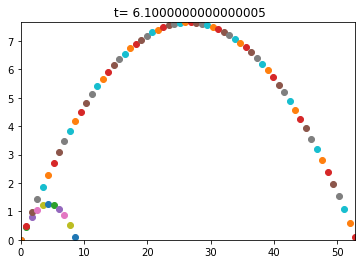

In [11]:
data = pd.read_csv('./datum/data.txt',delimiter='\t',encoding="UTF-8",
                 skiprows=1, 
                 names=['t','x','y','x1','y1'],
                 header=None)

#plt.plot(x[1],y[1], 'o')
plt.xlim(np.min(x1), np.max(x1))
plt.ylim(np.min(y1), np.max(y1))
for i in range(0,len(t),1):
    plt.plot(x[i],y[i], 'o')
    plt.plot(x1[i],y1[i], 'o')
    plt.title(" t= "+str(t[i]))
    plt.savefig("./fig/figure"+str(i)+".png")